# TEXT MINING ASSIGNMENT

# 1)For Text Mining assignment
 
 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

 TWO:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [1]:
import pandas as pd
import numpy as np
import string
import spacy
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
tweets = pd.read_csv("Elon_musk (1).csv",encoding = 'mac_roman',error_bad_lines = False)
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Iím an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
top_tweets = tweets.head(100)
top_tweets

,Unnamed: 0,Text
0,1,@kunalb11 Iím an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
95,96,Doge
96,97,https://t.co/vviUzWhodT
97,98,@Erdayastronaut High seas &amp; wind
98,99,This was a tough one https://t.co/beY7peFpCj


# TEXT PROCESSING

# Remove empty strings and both leading and trailing characters

In [4]:
top_tweets = [Text.strip() for Text in top_tweets.Text] 
top_tweets = [Text for Text in top_tweets if Text] 

top_tweets[0:10]

['@kunalb11 Iím an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

# STEP 2 = Joining list into one String / Text :


In [5]:

tweets_join = ''.join(top_tweets)
tweets_join

'@kunalb11 Iím an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine Itís getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is true p

In [6]:
from nltk.tokenize import TweetTokenizer


In [7]:
tokenizer = TweetTokenizer(strip_handles = True)

tweets_tokenizer = tokenizer.tokenize(tweets_join)
print(tweets_tokenizer)

['Iím', 'an', 'alien', '@ID_AA_Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', '@gtera27', 'Doge', 'is', 'underestimated', '@teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2ojFrodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM@OwenSparks_', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation.The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', '@GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'to', 'do', 'Clubhouse', 'with', ':/', '/', 't.co/3rWE9uHSTS@geoffkeighley', 'Itís', 'getting', 'realBought', 'some', 'Dogeco

In [8]:
tweets_tokenizer_join = ' '.join(tweets_tokenizer)
tweets_tokenizer_join

'Iím an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2ojFrodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM@OwenSparks_ Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely @GiveDirectly Just sent someJust agree to do Clubhouse with :/ / t.co/3rWE9uHSTS@geoffkeighley Itís getting realBought some Dogecoin for lil X , so he can be a toddler hodler @JoshManMode He definitely has issues , but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O@freewalletorg Any crypto wallet that

In [9]:
import string

tweets_punc_remove = tweets_tokenizer_join.translate(str.maketrans('','',string.punctuation))
tweets_punc_remove

'Iím an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2ojFrodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrMOwenSparks Haha thanks  Indeed  Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likely GiveDirectly Just sent someJust agree to do Clubhouse with   tco3rWE9uHSTSgeoffkeighley Itís getting realBought some Dogecoin for lil X  so he can be a toddler hodler JoshManMode He definitely has issues  but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7Ofreewalletorg Any crypto wallet that wonít give you your private keys should be avoided at all

# Removing 'https' / 'url' within text :


In [10]:

import re
tweets_url_remove = re.sub(r'http\S+', '', tweets_punc_remove)
tweets_url_remove

'Iím an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likely GiveDirectly Just sent someJust agree to do Clubhouse with   tco3rWE9uHSTSgeoffkeighley Itís getting realBought some Dogecoin for lil X  so he can be a toddler hodler JoshManMode He definitely has issues  but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923 U0001F923 This is true power haha  Any crypto wallet that wonít give you your private keys should be avoided at all costs freewalletorg Your app sucksRT  NASA has selected Falcon Heavy to launch th

# Splitting a sentence into a Words / Tokens :


In [11]:
from nltk.tokenize import word_tokenize
tweet_words = word_tokenize(tweets_url_remove , language = 'english', preserve_line = True)
print(tweet_words)

['Iím', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocationThe', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'to', 'do', 'Clubhouse', 'with', 'tco3rWE9uHSTSgeoffkeighley', 'Itís', 'getting', 'realBought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 

In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


False

# Removing Stop Words :


In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
tweet_stopwords = stopwords.words('english')

SW_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I','Ö','orÖ']
tweet_stopwords.extend(SW_list)

tweet_no_stopwords = [words for words in tweet_words if words not in tweet_stopwords]
print(tweet_no_stopwords)

['Iím', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocationThe', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'Clubhouse', 'tco3rWE9uHSTSgeoffkeighley', 'Itís', 'getting', 'realBought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'Thanks', 'fixing', 'freewalletorg', 'Please', 'unlock', 'account', 'AstroJordy', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'wonít', 'give', 'private', 'keys', 'avoided', 'costs', 'freewalletorg', 'Your', 'app', 'suck

# Normalizing the data :


In [14]:
tweet_lower_words = [Text.lower() for Text in tweet_no_stopwords]
print(tweet_lower_words[100:200])

['first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission', 'blkmdl3', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'rationaletienne', 'starlink', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'however', 'donö', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'must', 'scalable', 'gö', 'itís', 'meant', 'price', 'countries', 'only', 'difference', 'taxes', 'shipping', 'this', 'intended', 'earth', 'may', 'ideas', 'apply', 'mars', 'cryptoshrikar', 'xprize', 'team', 'manage', '100m', 'carbon', 'capture', 'prize', 'everyone', 'tesla', 'receives', 'stock', 'my', 'comp', 'stock', 'options', 'take', 'table', 'thatís', 'youíre', 'missingback', 'work', 'go', 'does', 'seem', 'bit', 'high', 'itsallrisky', 'doge', 'appears', 'inflationary', 'meaningfully', 'fixed', 'coins', 'per', 'unit']


# Stemming the data :


In [15]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

tweet_stemmed = [ps.stem(word) for word in tweet_lower_words]
print(tweet_stemmed[100:200])

['first', 'two', 'element', 'lunar', 'gateway', 'togeth', 'one', 'mission', 'blkmdl3', 'onc', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'rationaletienn', 'starlink', 'staggeringli', 'difficult', 'technic', 'econom', 'endeavor', 'howev', 'donö', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', 'net', 'valu', 'product', 'made', 'must', 'scalabl', 'gö', 'ití', 'meant', 'price', 'countri', 'onli', 'differ', 'tax', 'ship', 'thi', 'intend', 'earth', 'may', 'idea', 'appli', 'mar', 'cryptoshrikar', 'xprize', 'team', 'manag', '100m', 'carbon', 'captur', 'prize', 'everyon', 'tesla', 'receiv', 'stock', 'my', 'comp', 'stock', 'option', 'take', 'tabl', 'thatí', 'youír', 'missingback', 'work', 'go', 'doe', 'seem', 'bit', 'high', 'itsallriski', 'doge', 'appear', 'inflationari', 'meaning', 'fix', 'coin', 'per', 'unit']


# Lemmatization :


In [16]:
import spacy
import spacy
!python -m spacy download en_core_web_sm 
from spacy import displacy
    
nlp = spacy.load("en_core_web_sm")

Traceback (most recent call last):
  File "C:\Users\Punith sai\.ipython 123\lib\site-packages\urllib3\connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\Punith sai\.ipython 123\lib\site-packages\urllib3\connectionpool.py", line 386, in _make_request
    self._validate_conn(conn)
  File "C:\Users\Punith sai\.ipython 123\lib\site-packages\urllib3\connectionpool.py", line 1042, in _validate_conn
    conn.connect()
  File "C:\Users\Punith sai\.ipython 123\lib\site-packages\urllib3\connection.py", line 414, in connect
    self.sock = ssl_wrap_socket(
  File "C:\Users\Punith sai\.ipython 123\lib\site-packages\urllib3\util\ssl_.py", line 449, in ssl_wrap_socket
    ssl_sock = _ssl_wrap_socket_impl(
  File "C:\Users\Punith sai\.ipython 123\lib\site-packages\urllib3\util\ssl_.py", line 493, in _ssl_wrap_socket_impl
    return ssl_context.wrap_socket(sock, server_hostname=server_hostname)
  File "C:\Users\Punith sai\.ipython 123\lib\ssl.py", line

In [17]:
nlp = spacy.load('en_core_web_sm')
df = nlp(' '.join(tweet_lower_words))
print(df)

iím alien idaacarmack ray tracing cyberpunk hdr nextlevel have tried great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year now next even happy new year ox underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocationthe entertaining outcome likely givedirectly just sent somejust agree clubhouse tco3rwe9uhstsgeoffkeighley itís getting realbought dogecoin lil x toddler hodler joshmanmode he definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy this true power any crypto wallet wonít give private keys avoided costs freewalletorg your app sucksrt nasa selected falcon heavy launch first two elements lunar gateway together one mission blkmdl3 once predict cash flow reasonably well starlink ipo rationaletienne starlink staggeringly difficult technical economic endeavor however donö spacex needs pass deep chasm negative cash 

In [18]:
lemmas = [token.lemma_ for token in df]
print(lemmas)

['iím', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'gtera27', 'doge', 'underestimate', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocationthe', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'send', 'somejust', 'agree', 'clubhouse', 'tco3rwe9uhstsgeoffkeighley', 'itís', 'getting', 'realbought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'wonít', 'give', 'private', 'key', 'avoid', 'cost', 'freewalletorg', 'your', 'app', 'sucksrt', 'nasa', 'sel

In [19]:
clean_tweets = ' '.join(lemmas)
clean_tweets

'iím alien idaacarmack ray trace cyberpunk hdr nextlevel have try great interview gtera27 doge underestimate teslacn congratulation tesla china amazing execution last year now next even happy new year ox underdoge all thought would fail himself haha thank indeed tweet definitely represent realworld time allocationthe entertaining outcome likely givedirectly just send somejust agree clubhouse tco3rwe9uhstsgeoffkeighley itís getting realbought dogecoin lil x toddler hodler joshmanmode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy this true power any crypto wallet wonít give private key avoid cost freewalletorg your app sucksrt nasa select falcon heavy launch first two element lunar gateway together one mission blkmdl3 once predict cash flow reasonably well starlink ipo rationaletienne starlink staggeringly difficult technical economic endeavor however donö spacex need pass deep chasm negative cash flow next year low co

# Feature Extaction


# Using CountVectorizer :


In [20]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

tweets_cv = cv.fit_transform(lemmas)


In [21]:

print(cv.vocabulary_)

{'iím': 145, 'alien': 7, 'idaacarmack': 126, 'ray': 235, 'trace': 308, 'cyberpunk': 46, 'hdr': 116, 'nextlevel': 200, 'have': 114, 'try': 310, 'great': 106, 'interview': 136, 'gtera27': 108, 'doge': 60, 'underestimate': 319, 'teslacn': 289, 'congratulation': 38, 'tesla': 288, 'china': 30, 'amazing': 10, 'execution': 80, 'last': 156, 'year': 341, 'now': 203, 'next': 199, 'even': 78, 'happy': 113, 'new': 198, 'ox': 215, 'underdoge': 318, 'all': 8, 'thought': 298, 'would': 337, 'fail': 83, 'himself': 121, 'haha': 110, 'thank': 291, 'indeed': 131, 'tweet': 312, 'definitely': 53, 'represent': 245, 'realworld': 239, 'time': 301, 'allocationthe': 9, 'entertaining': 75, 'outcome': 212, 'likely': 163, 'givedirectly': 103, 'just': 150, 'send': 256, 'somejust': 266, 'agree': 6, 'clubhouse': 32, 'tco3rwe9uhstsgeoffkeighley': 283, 'itís': 144, 'getting': 100, 'realbought': 238, 'dogecoin': 62, 'lil': 165, 'toddler': 302, 'hodler': 123, 'joshmanmode': 148, 'he': 117, 'issue': 140, 'sentencing': 257,

In [22]:
print(tweets_cv.toarray()[100:200])


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Using CountVectorizer with N-grams (Bigrams & Trigrams) :


In [23]:
cv_ngrams = CountVectorizer(analyzer = 'word',ngram_range = (1,3),max_features = 100)

cv_ngrams_matrix = cv_ngrams.fit_transform(lemmas)


In [24]:
cv_ngrams_matrix

<461x100 sparse matrix of type '<class 'numpy.int64'>'
	with 197 stored elements in Compressed Sparse Row format>

In [25]:
cv_ngrams 

CountVectorizer(max_features=100, ngram_range=(1, 3))

In [26]:
print(cv_ngrams_matrix.toarray())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Using TF-IDF Vectorizer :


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [28]:

tf_idf_vec = TfidfVectorizer(norm = 'l2',analyzer = 'word',ngram_range = (1,3),max_features = 500)

tf_idf_vec_matrix = tf_idf_vec.fit_transform(lemmas)


In [29]:
feature_names = tf_idf_vec.get_feature_names_out()

print(feature_names)


['100' '300' '39a' '60' 'account' 'actually' 'agree' 'alien' 'all'
 'allocationthe' 'amazing' 'any' 'app' 'appear' 'apply' 'arm' 'astrogdogg'
 'astrojordy' 'avoid' 'back' 'become' 'bit' 'blkmdl3' 'booster' 'burn'
 'by' 'capture' 'carbon' 'cash' 'chasm' 'china' 'clear' 'clubhouse' 'coin'
 'collect' 'come' 'commandercruz' 'comp' 'congratulation' 'cost' 'country'
 'crypto' 'cryptoshrikar' 'cryptour' 'currency' 'cute' 'cyberpunk'
 'damian' 'datum' 'decade' 'deck' 'deep' 'default' 'definitely' 'destiny'
 'destroyer' 'difference' 'difficult' 'do' 'doesnít' 'doge' 'dogecakeyolt'
 'dogecoin' 'dogecoinrich' 'dogeno' 'donö' 'dumbnext' 'earth' 'easy'
 'economic' 'element' 'email' 'endeavor' 'engine' 'enough' 'entertaining'
 'erdayastronaut' 'essential' 'even' 'everyone' 'execution' 'explore'
 'extremely' 'fail' 'falcon' 'finally' 'first' 'fix' 'flameout' 'flow'
 'foolish' 'franz' 'freewalletorg' 'fun' 'future' 'galaxy' 'gas' 'gateway'
 'genius' 'get' 'getting' 'gigachad' 'give' 'givedirectly' 'go

# Define a Function To plot Word cloud 


In [30]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [31]:
from wordcloud import WordCloud, ImageColorGenerator
def plot_cloud(wordcloud):
    
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate Word Cloud :


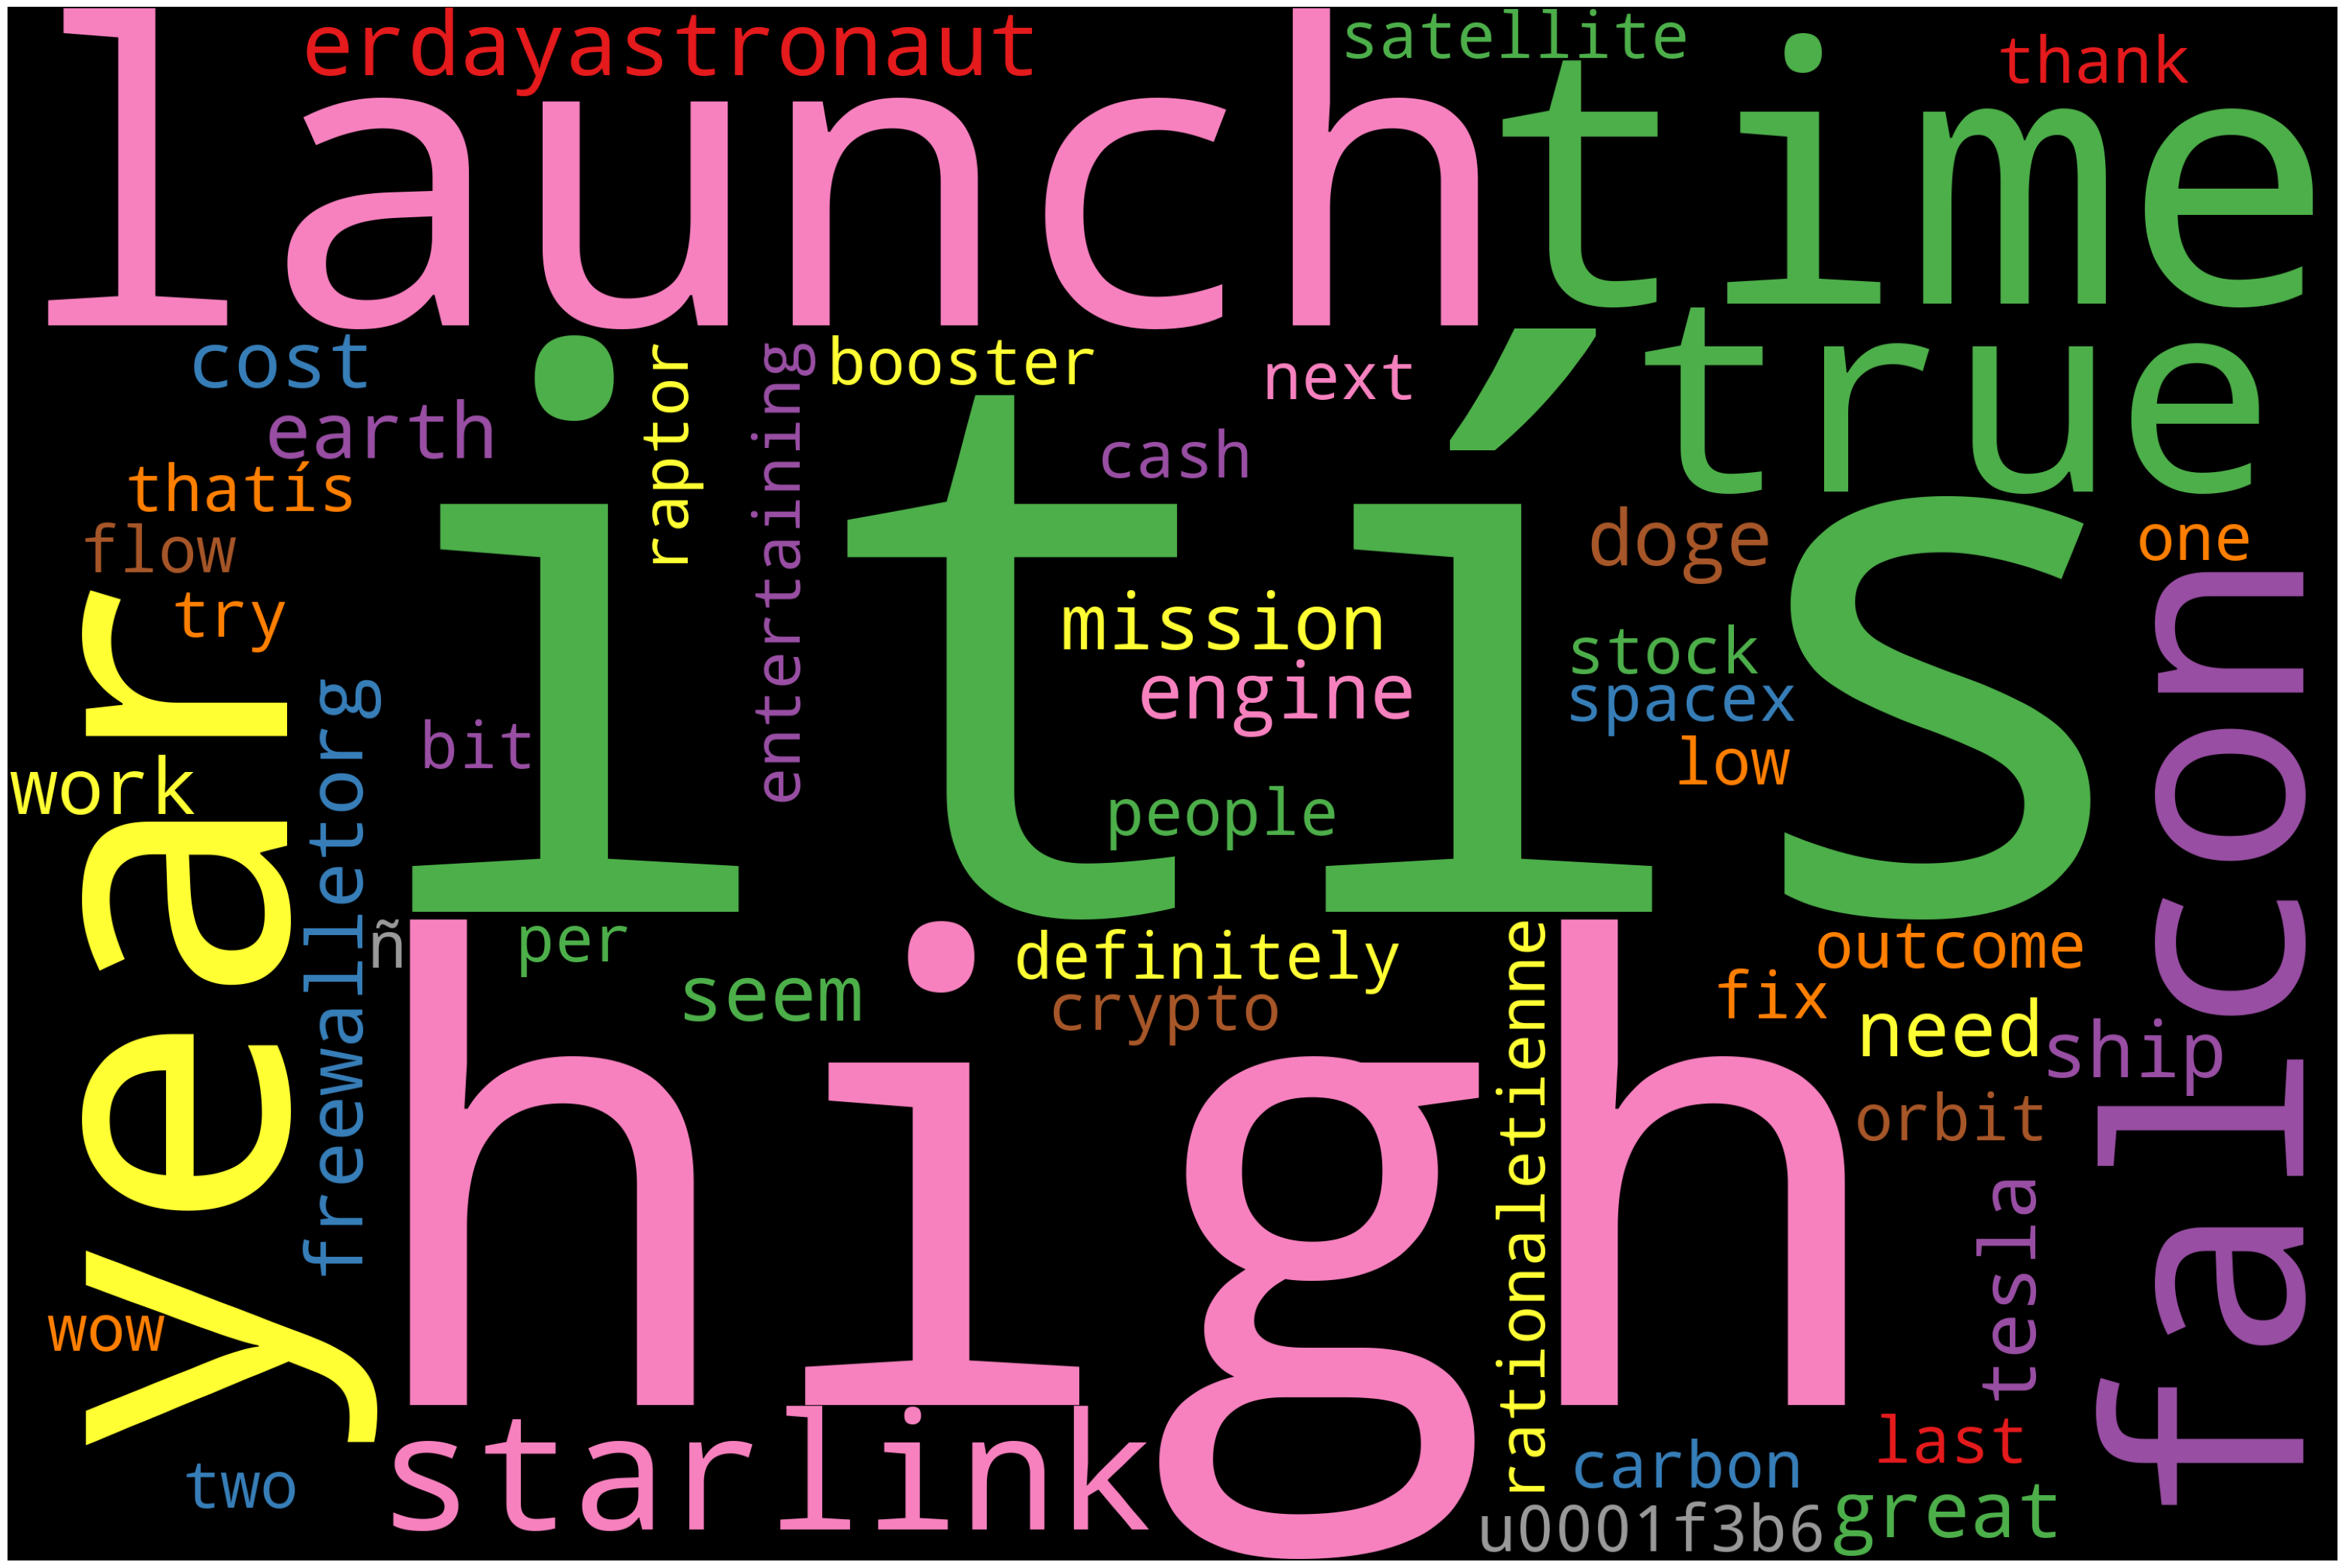

In [32]:
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')

wordcloud = WordCloud(width = 3000,height = 2000,background_color = 'black',max_words = 50,colormap = 'Set1',
                      stopwords = STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

In [33]:
nlp = spacy.load('en_core_web_sm')

one_block = clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style = 'ent',jupyter = True)

In [34]:
for token in doc_block[0:100]:
    print(token,token.pos_) 

iím AUX
alien PROPN
idaacarmack PROPN
ray PROPN
trace NOUN
cyberpunk NOUN
hdr NOUN
nextlevel NOUN
have AUX
try VERB
great ADJ
interview NOUN
gtera27 NOUN
doge PROPN
underestimate ADJ
teslacn PROPN
congratulation PROPN
tesla PROPN
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV
next ADV
even ADV
happy ADJ
new ADJ
year NOUN
ox NOUN
underdoge NOUN
all DET
thought NOUN
would AUX
fail VERB
himself PRON
haha PROPN
thank VERB
indeed ADV
tweet PROPN
definitely ADV
represent VERB
realworld PROPN
time NOUN
allocationthe PROPN
entertaining ADJ
outcome NOUN
likely ADV
givedirectly ADV
just ADV
send VERB
somejust ADJ
agree ADJ
clubhouse NOUN
tco3rwe9uhstsgeoffkeighley PROPN
itís PROPN
getting AUX
realbought VERB
dogecoin NOUN
lil NOUN
x PUNCT
toddler PROPN
hodler PROPN
joshmanmode PROPN
he PRON
definitely ADV
issue VERB
sentencing NOUN
seem VERB
bit NOUN
high ADJ
freewalletorg NOUN
thank NOUN
fix NOUN
freewalletorg NOUN
please INTJ
unlock PROPN
account PROPN
astrojordy NOUN
this D

In [35]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[0:100])

['trace', 'cyberpunk', 'hdr', 'nextlevel', 'try', 'interview', 'gtera27', 'execution', 'year', 'year', 'ox', 'underdoge', 'thought', 'fail', 'thank', 'represent', 'time', 'outcome', 'send', 'clubhouse', 'realbought', 'dogecoin', 'lil', 'issue', 'sentencing', 'seem', 'bit', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'astrojordy', 'power', 'wallet', 'wonít', 'give', 'avoid', 'cost', 'freewalletorg', 'launch', 'element', 'gateway', 'mission', 'blkmdl3', 'predict', 'cash', 'flow', 'starlink', 'endeavor', 'donö', 'spacex', 'pass', 'cash', 'flow', 'year', 'cost', 'ton', 'carbon', 'sequester', 'value', 'product', 'make', 'scalable', 'mean', 'price', 'country', 'difference', 'taxis', 'ship', 'intend', 'earth', 'idea', 'apply', 'team', 'manage', 'carbon', 'capture', 'prize', 'tesla', 'receive', 'stock', 'comp', 'stock', 'option', 'take', 'table', 'work', 'go', 'seem', 'bit', 'itsallrisky', 'appear', 'fix', 'unit', 'time', 'whereasö', 'erdayastronaut', 'launch', 'tower', 'stack']


In [36]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis = 0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Word','Count']
wd_df[0:10]

,Word,Count
0,launch,5
1,year,4
2,time,4
3,seem,3
4,freewalletorg,3
5,cost,3
6,starlink,3
7,ship,3
8,earth,3
9,work,3


# VISUALIZATION

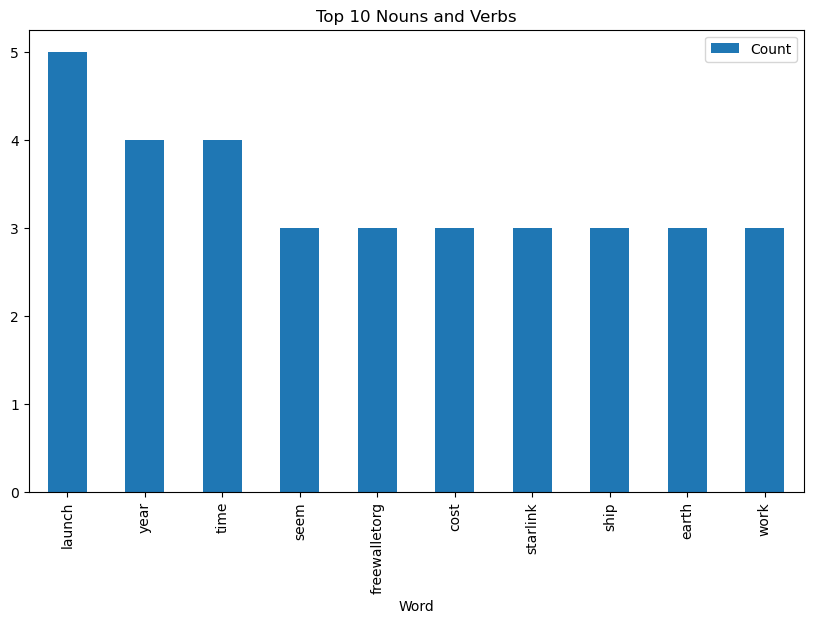

In [37]:
wd_df[0:10].plot.bar(x = 'Word',figsize = (10,6),title = 'Top 10 Nouns and Verbs');


# Emotion Mining - Sentiment Analysis


In [38]:
from nltk import tokenize
sentence = tokenize.sent_tokenize(' '.join(top_tweets))
sentence

['@kunalb11 Iím an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine Itís getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my acc

In [39]:
sent_df = pd.DataFrame(sentence,columns = ['sentence'])
sent_df

,sentence
0,@kunalb11 Iím an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
5,Happy New Year of the Ox!
6,https://t.co/9WFKMYu2oj Frodo was the underdog...
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...
8,Tweets definitely do not represent real-world ...
9,The most entertaining outcome is the most like...


In [40]:
affin = pd.read_csv("Afinn.csv",sep = ",",encoding = "Latin-1")
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [41]:
affin_scores = affin.set_index('word')['value'].to_dict()
affin_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [42]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affin_scores

def calculate_sentiment(text:str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [43]:
calculate_sentiment(text = 'great')


3

In [44]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0     0
1     0
2     3
3     3
4     0
5     0
6    -2
7     2
8     0
9     3
10    0
11   -2
12    0
13    0
14    0
15    0
16   -2
17    4
18    0
19    0
20    2
21    0
22    0
23   -3
24    4
25    1
26    1
27    0
28    1
29    3
30    3
31    4
32    2
33    1
34    1
35    3
36    1
Name: sentiment_value, dtype: int64

In [45]:
sent_df.sort_values(by = 'sentiment_value')


,sentence,sentiment_value
23,https://t.co/UEEocOfcTb The people have spoken...,-3
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2
16,Thatís what youíre missing.,-2
11,"However, if we donÖ https://t.co/9Z8Ac6skqx @R...",-2
0,@kunalb11 Iím an alien @ID_AA_Carmack Ray trac...,0
27,"Have to look at old notes, emails, texts.",0
22,Instructional video.,0
21,– is for –ogecoin!,0
19,Enough Raptors for orbit booster\n3.,0
15,"My comp is all stock/options, which I do not t...",0


In [46]:
sent_df[sent_df['sentiment_value']<=0]


,sentence,sentiment_value
0,@kunalb11 Iím an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
4,Now on to the next for even more!!,0
5,Happy New Year of the Ox!,0
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2
8,Tweets definitely do not represent real-world ...,0
10,https://t.co/3pWtÖ @ajtourville Yes @BLKMDL3 @...,0
11,"However, if we donÖ https://t.co/9Z8Ac6skqx @R...",-2
12,Must be scalable to gÖ https://t.co/XMyI7qWSgw...,0
13,Only difference should be taxes &amp; shipping.,0


In [47]:
sent_df[sent_df['sentiment_value'] > 0]


,sentence,sentiment_value
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2
9,The most entertaining outcome is the most like...,3
17,Back to work I go Ö @CapybaraSurfer @MattWalla...,4
20,Improve ship &amp; booster mass @michaelhodapp...,2
24,So Ö itís finally come to this Ö https://t.co/...,4
25,@JoshRoomsburg @SnoopDogg @genesimmons Its sim...,1
26,This is two decades of intense work.,1
28,@AstroJordy Yes Lessons learned Of Earth and M...,1


In [48]:
sent_df['index'] = range(0,len(sent_df))
sent_df

,sentence,sentiment_value,index
0,@kunalb11 Iím an alien @ID_AA_Carmack Ray trac...,0,0
1,Have you tried it?,0,1
2,@joerogan @Spotify Great interview!,3,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,3
4,Now on to the next for even more!!,0,4
5,Happy New Year of the Ox!,0,5
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,6
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,7
8,Tweets definitely do not represent real-world ...,0,8
9,The most entertaining outcome is the most like...,3,9


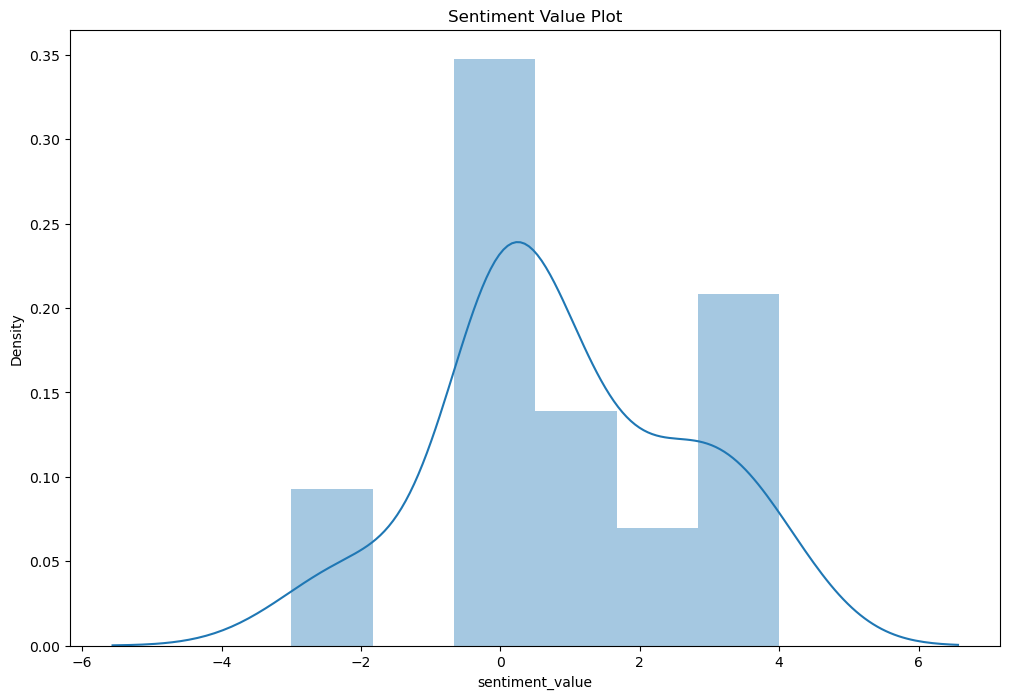

In [49]:
import seaborn as sns
plt.figure(figsize = (12,8))
sns.distplot(sent_df['sentiment_value'])
plt.title('Sentiment Value Plot')
plt.show()

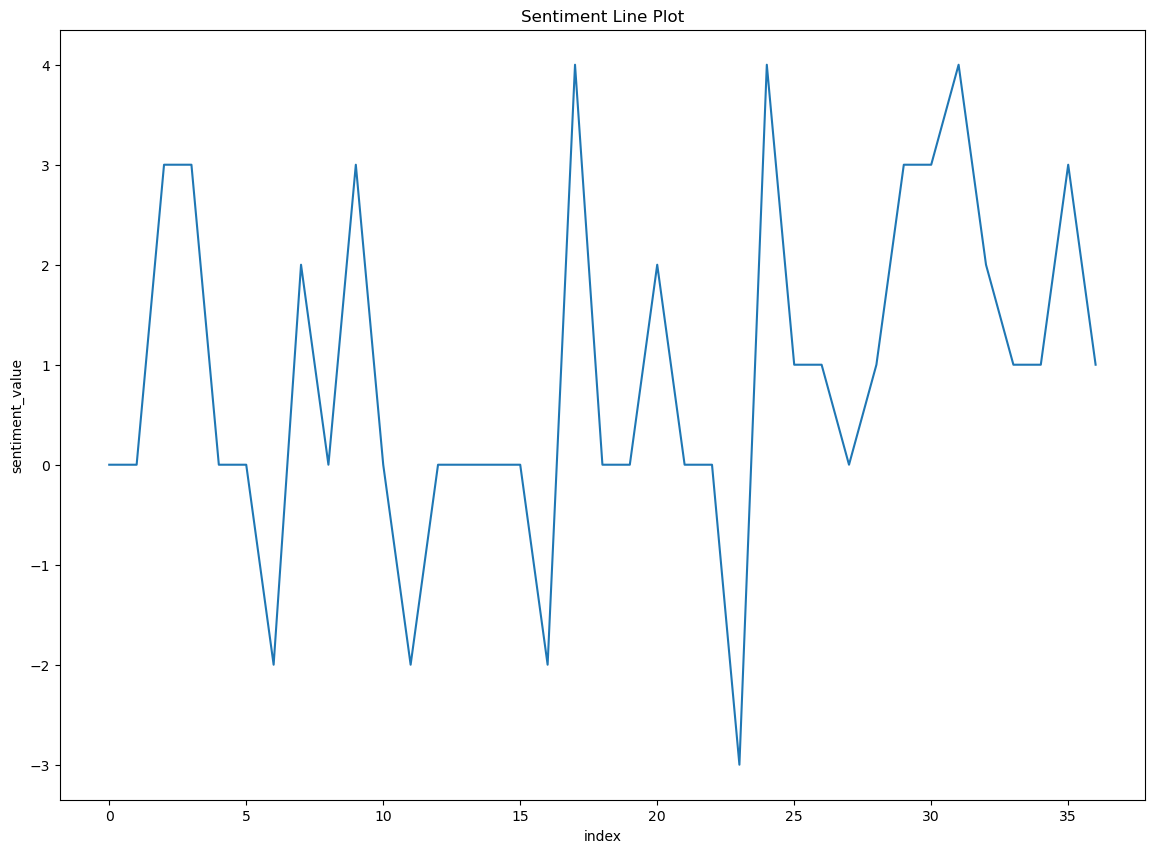

In [50]:
plt.figure(figsize = (14,10))
sns.lineplot(y ='sentiment_value',x = 'index',data = sent_df)
plt.title('Sentiment Line Plot')
plt.show()